#Assignment 1

##Imports

In [42]:
!pip install gymnasium matplotlib numpy
from google.colab import widgets
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import time
import random
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Stochastic Environment

In [44]:
class a1():
    def __init__(self):
        #IInitializing a 5 cross 5 grid world
        self.height = 5
        self.width = 5
        self.grid = np.zeros(( self.height, self.width)) - 1
        
        self.current_location = ( 0, 0)
        
        # Set locations for the pit and the end reward
        self.dead = (4,4)
        self.richierich = (3,3)
        self.reward_location1 = (1,2)
        self.reward_location2 = (2,2)
        self.terminal_states = [ self.dead, self.richierich]
        
        # Setting rewards 
        self.grid[ self.dead[0], self.dead[1]] = -100
        self.grid[ self.richierich[0], self.richierich[1]] = 100
        self.grid[ self.reward_location1[0], self.reward_location1[1]] = 10
        self.grid[ self.reward_location2[0], self.reward_location2[1]] = 10
        
        # Set available actions
        self.act = ['UP', 'DOWN', 'LEFT', 'RIGHT']
  
    
    def show_map(self):
        grid = np.zeros(( self.height, self.width))
        grid[ self.current_location[0], self.current_location[1]] = 1
        return grid
    
    def get_reward(self, X):
        return self.grid[ X[0], X[1]]
        
    
    def step(self, action,stochasticity=0.1):
        rando = np.random.uniform(0,1)
        if rando<stochasticity:
          action = random.choice(["UP", "DOWN", "LEFT", "RIGHT"])
        last_location = self.current_location
        #print("Action taken", action)
        # UP
        if action == 'UP':
            if last_location[0] == 0:
                reward = self.get_reward(last_location)
            else:
                self.grid[self.current_location[0], self.current_location[1]] = 0
                self.current_location = ( self.current_location[0] - 1, self.current_location[1])
                reward = self.get_reward(self.current_location)
        
        # DOWN
        elif action == 'DOWN':
            if last_location[0] == self.height - 1:
                reward = self.get_reward(last_location)
            else:
                self.grid[self.current_location[0], self.current_location[1]] = 0
                self.current_location = ( self.current_location[0] + 1, self.current_location[1])
                reward = self.get_reward(self.current_location)
            
        # LEFT
        elif action == 'LEFT':
            if last_location[1] == 0:
                reward = self.get_reward(last_location)
            else:
                self.grid[self.current_location[0], self.current_location[1]] = 0
                self.current_location = ( self.current_location[0], self.current_location[1] - 1)
                reward = self.get_reward(self.current_location)

        # RIGHT
        elif action == 'RIGHT':
            if last_location[1] == self.width - 1:
                reward = self.get_reward(last_location)
            else:
                self.grid[self.current_location[0], self.current_location[1]] = 0
                self.current_location = ( self.current_location[0], self.current_location[1] + 1)
                reward = self.get_reward(self.current_location)
        
        #print("Currrent location", self.current_location)
                
        return reward
    
    def check_state(self):
        """Check if the agent is in a terminal state (gold or bomb), if so return 'TERMINAL'"""
        if self.current_location in self.terminal_states:
            return 'TERMINAL'

In [45]:
class RandomAgent():        
    # Choose a random action
    def choose_action(self, available_actions):
        """Returns a random choice of the available actions"""
        return np.random.choice(available_actions) 

##Random Agent

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

UP


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DOWN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DOWN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

UP


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

UP


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LEFT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

UP


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RIGHT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RIGHT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LEFT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

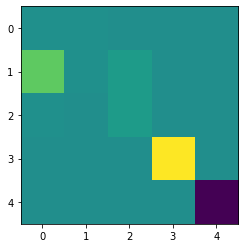

<IPython.core.display.Javascript object>

In [47]:
env = a1()
agent = RandomAgent()

con = env.check_state()

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  plt.imshow(env.grid)

counter = 0
r = 0
while con!= "TERMINAL" and counter<10:
  rand_action = agent.choose_action(env.act)
  reward = env.step(rand_action)
  print(rand_action)
  env.grid[env.current_location[0], env.current_location[1]] = 50
  r = r+reward
  #print(r)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    plt.imshow(env.grid)
  time.sleep(1)
  counter += 1



##Q-Learning Agent

In [48]:
class qlearning():
    def __init__(self, environment, alpha=0.2, gamma=0.98):
        self.environment = environment
        self.q_table = dict()
        for x in range(environment.height):
            for y in range(environment.width):
                self.q_table[(x,y)] = {'UP':0, 'DOWN':0, 'LEFT':0, 'RIGHT':0} 

        self.alpha = alpha
        self.gamma = gamma
        
    def choose_action(self, available_actions, epsilon):
        if np.random.uniform(0,1) < epsilon:
            action = available_actions[np.random.randint(0, len(available_actions))]
        else:
            q_values_of_state = self.q_table[self.environment.current_location]
            maxValue = max(q_values_of_state.values())
            action = np.random.choice([k for k, v in q_values_of_state.items() if v == maxValue])
        
        return action
    
    def learn(self, old_state, reward, new_state, action):
        q_values_of_state = self.q_table[new_state]
        max_q_value_in_new_state = max(q_values_of_state.values())
        current_q_value = self.q_table[old_state][action]
        
        self.q_table[old_state][action] = (1 - self.alpha) * current_q_value + self.alpha * (reward + self.gamma * max_q_value_in_new_state)


In [50]:
def play(environment, agent, trials=500, max_steps_per_episode=1000, epsilon = 0.95, decay = 0.995):
    reward_per_episode = [] 
    eps_list = []
    eps = epsilon
    for trial in range(trials): 
        cumulative_reward = 0 
        step = 0
        game_over = False
        while step < max_steps_per_episode and game_over != True: 
            old_state = environment.current_location
            action = agent.choose_action(['UP', 'DOWN', 'LEFT', 'RIGHT'], eps) 
            reward = environment.step(action)
            new_state = environment.current_location
            
            agent.learn(old_state, reward, new_state, action)
                
            cumulative_reward += reward
            step += 1
            
            if environment.check_state() == 'TERMINAL':
                environment.__init__()
                game_over = True     
                
        reward_per_episode.append(cumulative_reward) 
        eps_list.append(eps)
        eps = eps * decay

        
    return reward_per_episode, eps_list

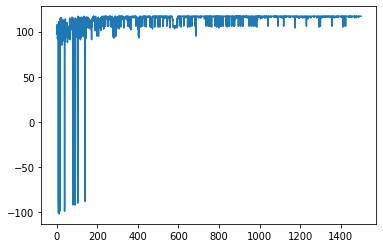

In [51]:
environment = a1()
agentQ = qlearning(environment)

reward_per_episode, epsilon_decay = play(environment, agentQ, trials=1500)

plt.plot(reward_per_episode)

Text(0.5, 0, 'Number of episodes')

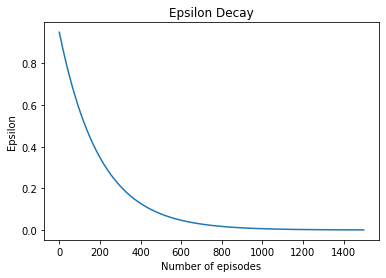

In [24]:
plt.plot(epsilon_decay)
plt.title("Epsilon Decay")
plt.ylabel("Epsilon")
plt.xlabel("Number of episodes")

In [22]:
import pickle
with open('q_values(QLearning).pickle', 'wb') as export:
  pickle.dump(agentQ.q_table, export)

In [23]:
with open('q_values(QLearning).pickle', 'rb') as impor:
  q_values_imported = pickle.load(impor)

#q_values_imported

###Q-Learning Agent Testing

6


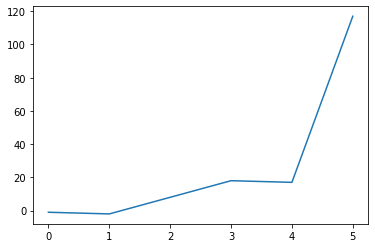

In [33]:
environment_testing = a1()
qagent_testing = qlearning(environment_testing)
rrr = 0
x=0
plo = []
while environment_testing.check_state() != "TERMINAL":
  new_state = environment_testing.current_location
  q_values_of_state = q_values_imported[new_state]
  maxValue = max(q_values_of_state.values())
  action = np.random.choice([k for k, v in q_values_of_state.items() if v == maxValue])
  #print(new_state)
  #print(action)
  reward = environment_testing.step(action)
  new_state = environment_testing.current_location
  rrr += reward
  plo.append(rrr)
  x+=1
print(x)


# Simple learning curve
plt.plot(plo)

##SARSA

In [52]:
class sarsa():
    def __init__(self, environment, alpha=0.2, gamma=0.95):
        self.environment = environment
        self.q_table = dict()
        for x in range(environment.height): 
            for y in range(environment.width):
                self.q_table[(x,y)] = {'UP':0, 'DOWN':0, 'LEFT':0, 'RIGHT':0}

        self.alpha = alpha
        self.gamma = gamma
        
    def choose_action(self, available_actions, epsilon):
        if np.random.uniform(0,1) < epsilon:
            action = available_actions[np.random.randint(0, len(available_actions))]
        else:
            q_values_of_state = self.q_table[self.environment.current_location]
            maxValue = max(q_values_of_state.values())
            action = np.random.choice([k for k, v in q_values_of_state.items() if v == maxValue])
        
        return action
    
    def learn(self, old_state, reward, new_state, action, next_action):
        current_q_value = self.q_table[old_state][action]
        
        
        self.q_table[old_state][action] = (1 - self.alpha) * current_q_value + self.alpha * (reward + self.gamma * self.q_table[new_state][next_action])


In [53]:
def sar_play(environment, agent, trials=500, max_steps_per_episode=20, epsilon = 0.99, decay = 0.995):
    reward_per_episode = [] 
    eps_list = []
    eps = epsilon
    for trial in range(trials): 
        cumulative_reward = 0 
        step = 0
        game_over = False
        while step < max_steps_per_episode and game_over != True:
            old_state = environment.current_location
            action = agent.choose_action(['UP', 'DOWN', 'LEFT', 'RIGHT'], eps) 
            reward = environment.step(action)
            new_state = environment.current_location
            next_action = agent.choose_action(['UP', 'DOWN', 'LEFT', 'RIGHT'], eps)
            
            agent.learn(old_state, reward, new_state, action, next_action)
                
            cumulative_reward += reward
            step += 1
            
            if environment.check_state() == 'TERMINAL':
                environment.__init__()
                game_over = True     
                
        reward_per_episode.append(cumulative_reward)
        #print("Cumulative reward", cumulative_reward)
        eps_list.append(eps)
        eps = eps * decay

        
    return reward_per_episode, eps_list

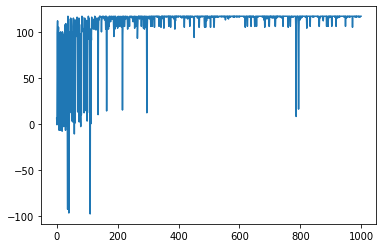

In [55]:
environment_sarsa = a1()
agent_sarsa = sarsa(environment_sarsa)

reward_per_episode, epsilon_decay = sar_play(environment_sarsa, agent_sarsa, trials=1000)

plt.plot(reward_per_episode)

Text(0.5, 0, 'Number of episodes')

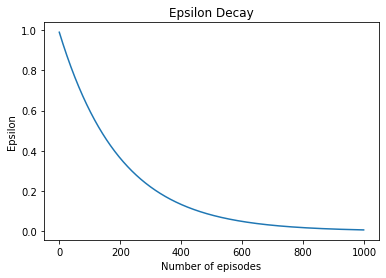

In [56]:
plt.plot(epsilon_decay)
plt.title("Epsilon Decay")
plt.ylabel("Epsilon")
plt.xlabel("Number of episodes")

In [57]:
import pickle
with open('q_values(SARSA).pickle', 'wb') as export:
  pickle.dump(agentQ.q_table, export)

In [58]:
with open('q_values(QLearning).pickle', 'rb') as impor:
  q_values_imported_sarsa = pickle.load(impor)

#q_values_imported

###SARSA Testing

6


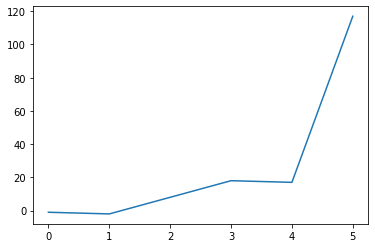

In [40]:
environment_testing = a1()
sagent_testing = sarsa(environment_testing)
rrr = 0
x=0
plo = []
while environment_testing.check_state() != "TERMINAL":
  q_values_of_state = q_values_imported_sarsa[new_state]
  maxValue = max(q_values_of_state.values())
  action = np.random.choice([k for k, v in q_values_of_state.items() if v == maxValue])
  #print(action)
  reward = environment_testing.step(action)
  new_state = environment_testing.current_location
  rrr += reward
  plo.append(rrr)
  x+=1
print(x)


# Simple learning curve
plt.plot(plo)